<a href="https://colab.research.google.com/github/NguyenThiHongLinh/ML2023/blob/main/Lab_7_20130306_NguyenThiHongLinh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [1]:
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [29]:
#code
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import mode
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import scipy.cluster.hierarchy as shc


In [14]:
data=datasets.load_iris()
X=data.data
y=data.target
clf=svm.SVC(kernel='sigmoid', random_state=2)
scores_recall=cross_validate(clf,X,y, scoring='recall_macro',cv=10)
scores_f1=cross_validate(clf,X,y, scoring='f1_macro', cv=10)
scores_accu=cross_validate(clf,X,y, scoring='accuracy', cv=10)
#print(sorted(scores_recall.keys()))
# print("fit_time", np.mean(scores_f1['fit_time']))
# print("score_time", np.mean(scores_f1['score_time']))
# print("test_score", np.mean(scores_f1['test_score']))

print("recall",np.mean(scores_recall['test_score']))
print("f1",np.mean(scores_f1['test_score']))
print("accuracy",np.mean(scores_accu['test_score']))

recall 0.06666666666666667
f1 0.041984126984126985
accuracy 0.06666666666666668


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [15]:
#FeatureSelection
X.shape
X_new = SelectKBest(chi2, k=2).fit_transform(X,y)
X_new.shape
# X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.5, random_state=0)
# clf_rf=RandomForestClassifier(n_estimators=100)
# clf_rf.fit(X_train,y_train)
# y_pre_rf=clf_rf.predict(X_test)
# print(metrics.classification_report(y_test,y_pre_rf))

#buiding model 
cv=KFold(n_splits=10, random_state=1, shuffle=True)
model=svm.SVC(kernel='rbf', random_state=0)
scores=cross_val_score(model, X_new,y,scoring='accuracy', cv=cv)
print('scores.mean: ',scores.mean())

#RandomForest
clf=RandomForestClassifier(n_estimators=100)
scores = cross_validate(clf, X_new, y, scoring ="accuracy", cv = 10)
print("fit_time", np.mean(scores['fit_time']))
print("score_time", np.mean(scores['score_time']))
print("test_score", np.mean(scores['test_score']))


scores.mean:  0.9400000000000001
fit_time 0.5536569833755494
score_time 0.033980393409729005
test_score 0.96


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

[2159057.2910406236, 1914619.6175501016, 1730182.260086909, 1612277.906092472, 1497591.9371451775, 1404977.0868053779, 1336459.897206998, 1264979.635437828, 1202291.6681977361, 1165171.7210800252]


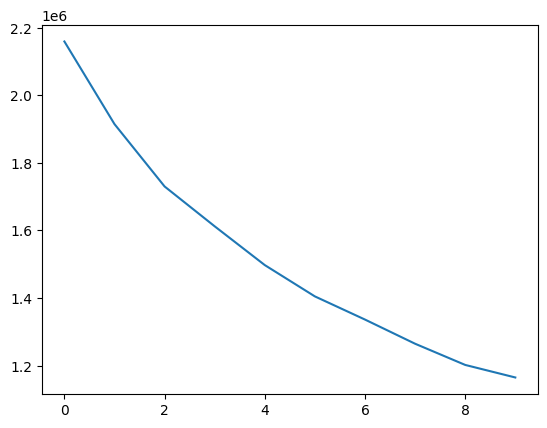

In [18]:
from sklearn.preprocessing import StandardScaler
# code
mnist=datasets.load_digits()
# kmeans = KMeans(n_clusters = 3, random_state = 0, init='k-means++', n_init=10)
# kmeans.fit(mnist.data)
# clusters = kmeans.predict(mnist.data)
# kmeans.cluster_centers_.shape
# scaler=StandardScaler()
# scaled_features=scaler.fit_transform(mnist.data)
sse = []
for k in range(1, 11):
    #kmeans = KMeans(n_clusters=k, random_state = 2)
    kmeans = KMeans(n_clusters = k, random_state = 2, init='k-means++', n_init=10)
    kmeans.fit(mnist.data)
    clusters = kmeans.predict(mnist.data)
    sse.append(kmeans.inertia_)
print(sse)
plt.plot(sse)

In [23]:
kmeans = KMeans(n_clusters = 10, n_init=10, random_state = 0)
kmeans.fit(mnist.data)
clusters = kmeans.predict(mnist.data)
kmeans.cluster_centers_.shape

labels = np.zeros_like(clusters)
# for i in range(10):
#   mask = (clusters == i)
#   # print(mask)
#   labels[mask] = mode(mnist.target[mask])[0]
  # print(labels[mask])
print("accuracy: ",accuracy_score(mnist.target, labels))
print("precision: ",precision_score(mnist.target, labels,average="macro"))
print("recall: ",recall_score(mnist.target, labels,average="macro"))
print("f1: ",f1_score(mnist.target, labels,average="macro"))

accuracy:  0.09905397885364496
precision:  0.009905397885364497
recall:  0.1
f1:  0.018025316455696203


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [26]:
# code
#RF
clf=RandomForestClassifier(n_estimators=100)
scores_Random_a = cross_validate(clf, X, y, scoring ="accuracy", cv = 10 )
scores_Random_p = cross_validate(clf, X, y, scoring ="precision_macro", cv = 10 )
scores_Random_r = cross_validate(clf, X, y, scoring ="recall_macro", cv = 10 )
scores_Random_f = cross_validate(clf, X, y, scoring ="f1_macro", cv = 10 )

# kNN
knn = KNeighborsClassifier(n_neighbors=5)
scores_kNN_a = cross_validate(clf, X, y, scoring ="accuracy", cv = 10 )
scores_kNN_p = cross_validate(clf, X, y, scoring ="precision_macro", cv = 10 )
scores_kNN_r = cross_validate(clf, X, y, scoring ="recall_macro", cv = 10 )
scores_kNN_f = cross_validate(clf, X, y, scoring ="f1_macro", cv = 10 )

#NaiveBayes 
clf = GaussianNB()
scores_Gauss_a = cross_validate(clf, X, y, scoring ="accuracy", cv = 10 )
scores_Gauss_p = cross_validate(clf, X, y, scoring ="precision_macro", cv = 10 )
scores_Gauss_r = cross_validate(clf, X, y, scoring ="recall_macro", cv = 10 )
scores_Gauss_f = cross_validate(clf, X, y, scoring ="f1_macro", cv = 10 )

data={'accuracy':[np.mean(scores_Random_a['test_score']),np.mean(scores_kNN_a['test_score']),np.mean(scores_Gauss_a['test_score']), accuracy_score(mnist.target, labels)],
      'precision':[np.mean(scores_Random_p['test_score']),np.mean(scores_kNN_p['test_score']),np.mean(scores_Gauss_p['test_score']), precision_score(mnist.target, labels,average="macro")],
      'recall':[np.mean(scores_Random_r['test_score']),np.mean(scores_kNN_r['test_score']),np.mean(scores_Gauss_r['test_score']), recall_score(mnist.target, labels,average="macro")],
      'f1':[np.mean(scores_Random_f['test_score']),np.mean(scores_kNN_f['test_score']),np.mean(scores_Gauss_f['test_score']),f1_score(mnist.target, labels,average="macro")]}

row_labels = ['Random forest', 'kNN','NaiveBayes', 'KMeans']

dframe = pd.DataFrame(data=data,index = row_labels)
dframe

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,precision,recall,f1
Random forest,0.960000,0.964444,0.953333,0.959731
kNN,0.960000,0.964444,0.966667,0.959731
NaiveBayes,0.953333,0.962698,0.953333,0.952441
KMeans,0.099054,0.009905,0.100000,0.018025


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [27]:
#code
print('Supervised learning is better than Unsupervised learning')

Supervised learning is better than Unsupervised learning


2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

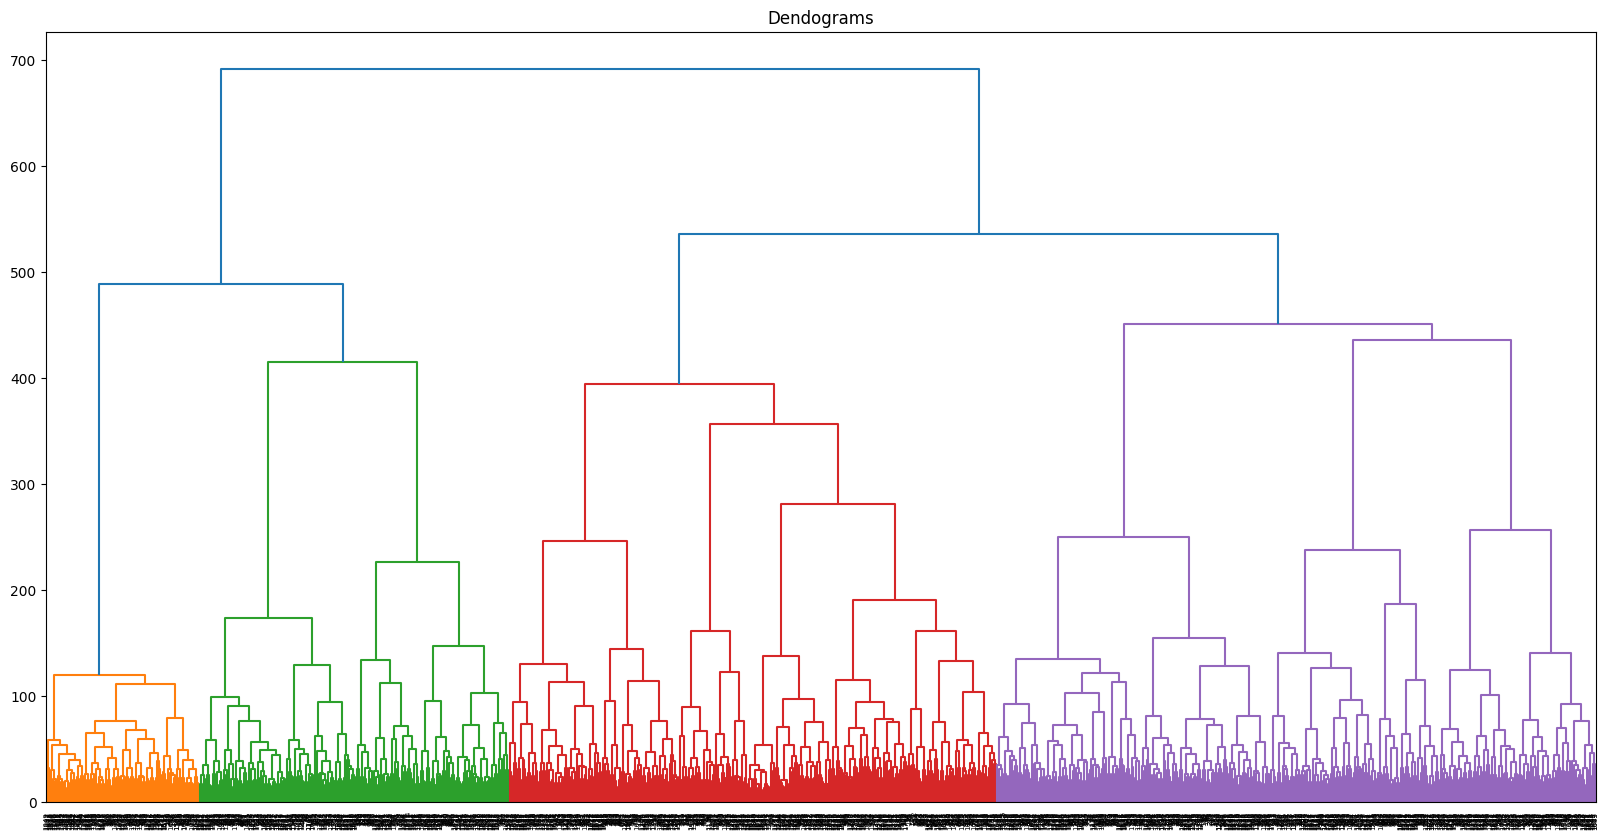

In [32]:
plt.figure(figsize=(20, 10))
plt.title("Dendograms")
ddg = shc.dendrogram(shc.linkage(mnist.data, method='ward'))

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





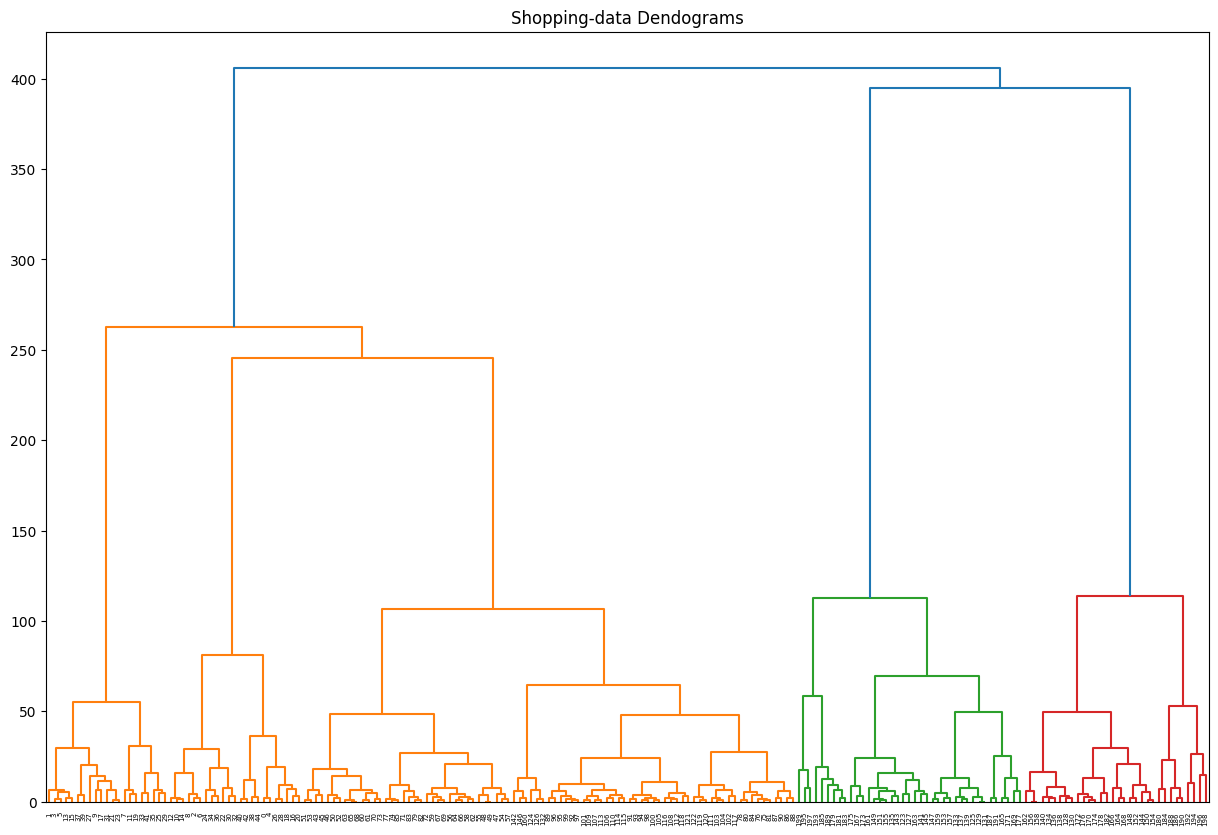

In [34]:
#code
data = pd.read_csv("shopping-data.csv")

plt.figure(figsize=(15, 10)) 
plt.title("Shopping-data Dendograms")
ddgr = shc.dendrogram(shc.linkage(data.iloc[:, 3:5].values, method='ward'))

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

[181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37265.86520484346, 30273.394312070042, 25044.967764018933, 21884.744095710274, 19692.557418227763]


Text(0.5, 0, 'k')

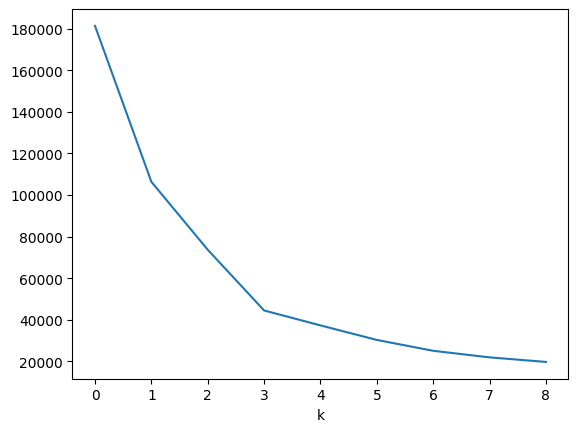

In [42]:
#code
SSE = []
for k in range(2, 11):
    #kmeans = KMeans(n_clusters=k, random_state = 2)
    kmeans = KMeans(n_clusters=k, max_iter=500, n_init=10, random_state = 40)
    kmeans.fit(data.iloc[:, 3:5].values)
    SSE.append(kmeans.inertia_)
print(SSE)
plt.plot(SSE, label='SSE')
plt.xlabel('k')

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [46]:
#code

#Finally,
Save a copy in your Github. Remember renaming the notebook.